In [2]:
from read_ggp_run import *

In [3]:
params_config = {'mean_lambda': 'bound',
                    'gamma_lambda': 'bound',
                    'var_lambda': 'bound',
                    'mean_q': 'bound',
                    'gamma_q': 'bound',
                    'var_q':'bound',
                    'beta':'bound',
                    'var_x':'bound',
                    'var_g':'bound',
                    'var_dx':'bound',
                    'var_dg':'bound'} 


In [35]:
def plot_true_vs_estim(directory, sample, parameter, run_range, params_config, parameter2=None, log=True, err_bar_index=2):
    fig, ax = plt.subplots(figsize=(5,3))

    inits = []
    if parameter2 == None:
        parameter2 = parameter

    for i in run_range:
        directory_i = directory.format(i)
        sample_i = sample.format(i)
        filebase = default_filebase(directory_i, sample_i) # default

        _, minimization_final_file = get_minimization_file(filebase, params_config)
        parameters_settings = read_params_config(minimization_final_file)

        init = get_params_config(parameters_settings, parameter2)["init"].values[0]
        final = get_params_config(parameters_settings, parameter)["final"].values[0]
        err_bar = pd.read_csv(minimization_final_file, skiprows=14)[parameter].iloc[err_bar_index]

        ax.errorbar(init, final, yerr=err_bar, color='tab:blue',  fmt='o', ms=3, label="deviation prediction")

        # ax.scatter(init, final, color='tab:blue')
        inits.append(init)
    
    ax.set_ylabel("estim. "+parameter)
    ax.set_xlabel("'true' "+parameter2)
    if log == 'x':
        plt.xscale('log')
    if log == True:
        plt.xscale('log')
        plt.yscale('log')

    if parameter2 == parameter:
        ax.plot(inits, inits, ls='--',  color='tab:blue')

    # ax.set_xticks(param_range)
    # ax.set_xticklabels([ str(v) for i,v in enumerate(param_range)])

    # plt.legend(loc=(1.05,0))
    plt.show()


def plot_all_params(directory, sample, parameter, param_range, params_config, skip=0, logx=False):
    fig, ax = plt.subplots(figsize=(10,6))
    cmap = plt.cm.tab10

    if len(np.unique(param_range))==1:
        replicates = True
    else:
        replicates = False
    for i, param in enumerate(param_range):
        i+=skip

        directory_i = directory.format(i)
        sample_i = sample.format(i)

        filebase = default_filebase(directory_i, sample_i) # default
        minimization_iter_file, minimization_final_file = get_minimization_file(filebase, params_config)
        for j,k in enumerate(params_config.keys()):
            if k != parameter:
                parameters_settings = read_params_config(minimization_final_file)
                final = get_params_config(parameters_settings, k)["final"].values[0]
                init = get_params_config(parameters_settings, k)["init"].values[0]
        
                if replicates:
                    if i==skip:
                        plt.scatter(i, init/final, color=cmap(j), label=k)
                    else: 
                        plt.scatter(i, init/final, color=cmap(j))
                else:
                    if i==skip:
                        plt.scatter(param, init/final, color=cmap(j), label=k)
                    else: 
                        plt.scatter(param, init/final, color=cmap(j))
    if logx:    
       plt.xscale('log')

    if replicates:
        ax.set_xticks([i/2])
        ax.set_xticklabels([str(param)])
    else:
        ax.set_xticks(param_range)
        ax.set_xticklabels([ str(v) for i,v in enumerate(param_range)])
        ax.set_ylabel("true/estim.")
    ax.set_xlabel(parameter)
    ax.axhline(1, ls='--', color='tab:blue')

    plt.legend(loc=(1.05,0))
    plt.show()


In [36]:
i =0 
directory = '../data/vary_param2250betasizer/'
sample = 'vary_param2250betasizer_{:d}'
directory+=sample

directory_i = directory.format(i)
sample_i = sample.format(i)
filebase = default_filebase(directory_i, sample_i) # default

_, minimization_final_file = get_minimization_file(filebase, {'mean_lambda': 'bound',
                                                        'gamma_lambda': 'bound',
                                                        'var_lambda': 'bound',
                                                        'mean_q': 'bound',
                                                        'gamma_q': 'bound',
                                                        'var_q':'bound',
                                                        'beta':'bound',
                                                        'var_x':'bound',
                                                        'var_g':'bound',
                                                        'var_dx':'bound',
                                                        'var_dg':'free'} )



## Parameter estimation sizer cells


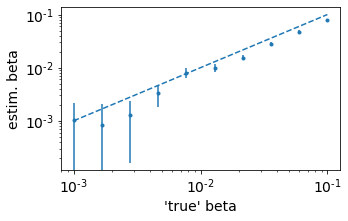

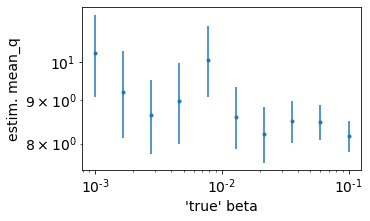

In [39]:

direct = '../data/vary_param2250betasizer/'
sample = 'vary_param2250betasizer_{:d}'
direct+=sample
plot_true_vs_estim(direct,sample, 'beta', np.arange(10), {'mean_lambda': 'bound',
                                                        'gamma_lambda': 'bound',
                                                        'var_lambda': 'bound',
                                                        'mean_q': 'bound',
                                                        'gamma_q': 'bound',
                                                        'var_q':'bound',
                                                        'beta':'bound',
                                                        'var_x':'bound',
                                                        'var_g':'bound',
                                                        'var_dx':'bound',
                                                        'var_dg':'free'} , log=True)

plot_true_vs_estim(direct,sample, 'mean_q', np.arange(10), {'mean_lambda': 'bound',
                                                        'gamma_lambda': 'bound',
                                                        'var_lambda': 'bound',
                                                        'mean_q': 'bound',
                                                        'gamma_q': 'bound',
                                                        'var_q':'bound',
                                                        'beta':'bound',
                                                        'var_x':'bound',
                                                        'var_g':'bound',
                                                        'var_dx':'bound',
                                                        'var_dg':'free'}, parameter2="beta" , log=True)

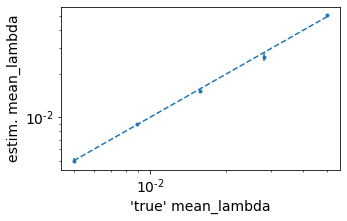

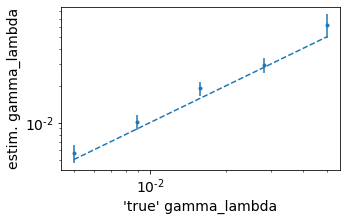

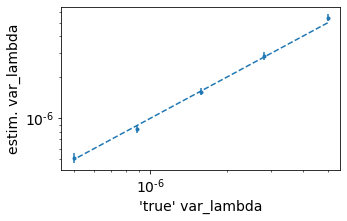

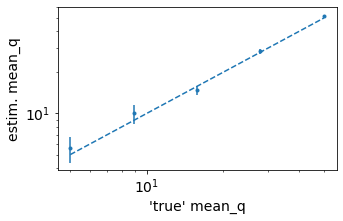

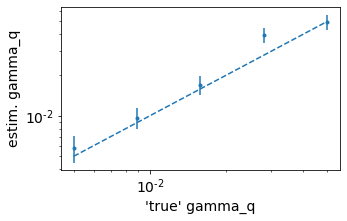

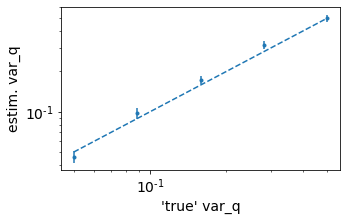

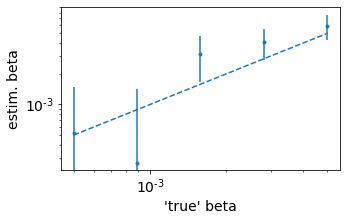

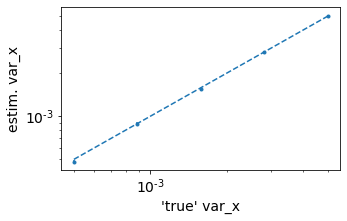

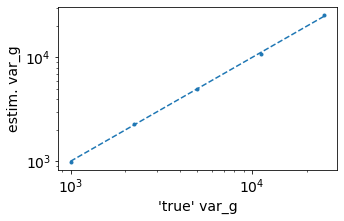

In [34]:
for p in list(params_config.keys())[:-2]:
    direct = '../data/vary_param_n250_' + p + '_sizer/'
    sample = 'vary_param_n250_' + p + '_sizer_{:d}'
    direct+=sample
    # plot_true_vs_estim('../data/vary_param_n250_gamma_lambda_sizer/vary_param_n250_gamma_lambda_sizer_{:d}',       'vary_param_n250_gamma_lambda_sizer_{:d}', "gamma_lambda", np.arange(5), params_config, log=True)
    plot_true_vs_estim(direct,sample, p, np.arange(5), {'mean_lambda': 'bound',
                                                        'gamma_lambda': 'bound',
                                                        'var_lambda': 'bound',
                                                        'mean_q': 'bound',
                                                        'gamma_q': 'bound',
                                                        'var_q':'bound',
                                                        'beta':'bound',
                                                        'var_x':'bound',
                                                        'var_g':'bound',
                                                        'var_dx':'bound',
                                                        'var_dg':'free'}, log=True)


## Timer cells

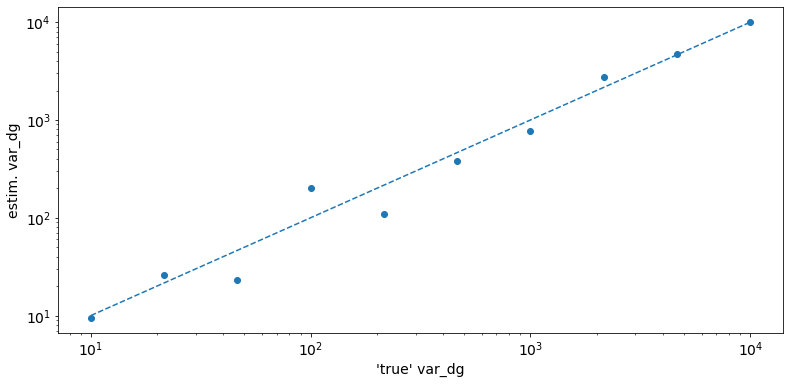

In [10]:
plot_true_vs_estim('../data/var_dg_timer_cells/var_dg_timer_cells_{:d}', 'var_dg_timer_cells_{:d}', "var_dg", np.logspace(1, 4, 10), params_config, log=True, skip=2)

#  '../data/var_dg_timer/var_dg_timer_3/'

## fuzzy parameters


In [30]:
def plot_noisy_param_run(directory, sample, x_param_range, params_config, skip=0, cols=3, width=14):
    """ plots the scan for all filenames as a grid """
    no_params = len(params_config)
    rows = np.ceil(no_params/cols).astype(int)
    fig, axes = plt.subplots(rows, cols, figsize=(width,0.7*width/cols*rows))
    ax = axes.ravel()
    for i, k in enumerate(params_config.items()):
        n = 0
        while n < len(x_param_range):
            j = n + skip
            directory_j = directory.format(j)
            sample_j = sample.format(j)
            filebase = default_filebase(directory_j, sample_j) # default
            minimization_iter_file, minimization_final_file = get_minimization_file(filebase, params_config)
            if os.path.isfile(minimization_final_file):
                parameters_settings = read_params_config(minimization_final_file)
                final = get_params_config(parameters_settings, k[0])["final"].values[0]
                init = get_params_config(parameters_settings, k[0])["init"].values[0]
                ax[i].scatter(n, final, color="tab:blue")
                ax[i].scatter(n, init, color="tab:orange")
            n += 1

        # ax[i].ticklabel_format(style='sci', scilimits=(0,1), useOffset=False)
        ax[i].set_ylabel(k[0])
        ax[i].set_xlabel("run")
    for i in range(len(params_config), len(ax)):
        plt.delaxes(ax[i])
    plt.tight_layout()

    plt.show()

In [31]:
noise_levels = [0.3 for i in range(20)]
# noise_levels =noise_levels[:15]

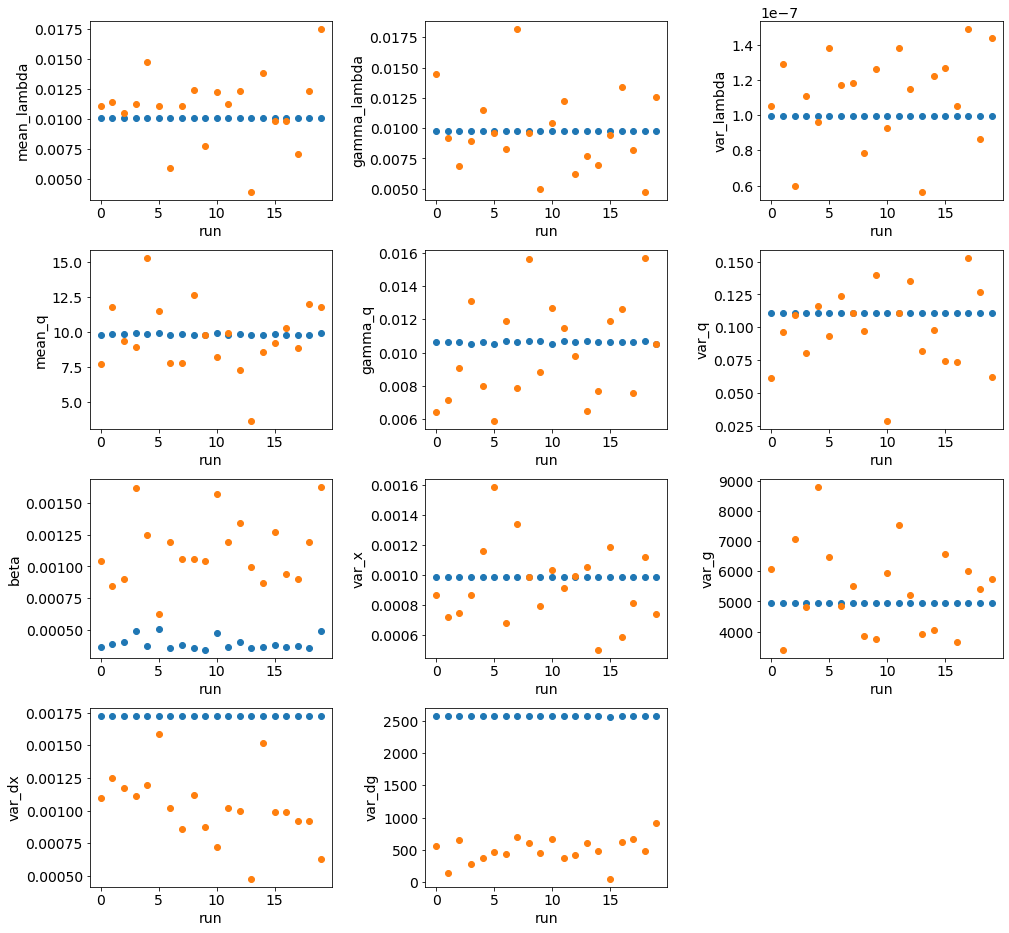

In [37]:
plot_noisy_param_run('../data/fuzzy_param_guess_sizer/fuzzy_param_guess_sizer_{:d}', 'fuzzy_param_guess_sizer_{:d}', noise_levels,  {'mean_lambda': 'bound',
                'gamma_lambda': 'bound',
                'var_lambda': 'bound',
                'mean_q': 'bound',
                'gamma_q': 'bound',
                'var_q':'bound',
                'beta':'bound',
                'var_x':'bound',
                'var_g':'bound',
                'var_dx':'bound',
                'var_dg':'free'} , skip=0, cols=3, width=14)

